# Customer Churn Prediction - Data Overview
This notebook serves as the first step in our project, where we will explore the customer churn dataset, inspect its structure, and gather preliminary insights. By the end of this notebook, we will have a better understanding of the data and be ready for further preprocessing and analysis.
## Key Steps in this Notebook:
- Load the dataset.
- Get basic dataset information.
- Examine unique values in dataset.
- Descriptive statistics for numerical features.
- Analyze the target variable.


### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline within the notebook
%matplotlib inline

### Load the Dataset

In [4]:
file_path = "../data/raw/Telco-Customer-Churn.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found. Please check the path: {file_path}")

Dataset loaded successfully!


### Basic Datset Information

In [8]:
# Inspect the first few rows of the datset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
# Check the dimensions of the dataset (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 7043 rows and 21 columns.


In [10]:
# Check the data types and column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Understanding Data Types and Unique Values

In [17]:
# Summary of unique values for each column
print("Number of unique values for each column:")
df.nunique()

Number of unique values for each column:


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [29]:
# Understanding the unique values in each categorical column
categorical_columns = df.select_dtypes(include="object").columns
for col in categorical_columns:
    print(f"{col} has {df[col].nunique()} unique values.")

customerID has 7043 unique values.
gender has 2 unique values.
Partner has 2 unique values.
Dependents has 2 unique values.
PhoneService has 2 unique values.
MultipleLines has 3 unique values.
InternetService has 3 unique values.
OnlineSecurity has 3 unique values.
OnlineBackup has 3 unique values.
DeviceProtection has 3 unique values.
TechSupport has 3 unique values.
StreamingTV has 3 unique values.
StreamingMovies has 3 unique values.
Contract has 3 unique values.
PaperlessBilling has 2 unique values.
PaymentMethod has 4 unique values.
TotalCharges has 6531 unique values.
Churn has 2 unique values.


### Descriptive Statistics for Numerical Features

In [22]:
# Summary statistics for numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


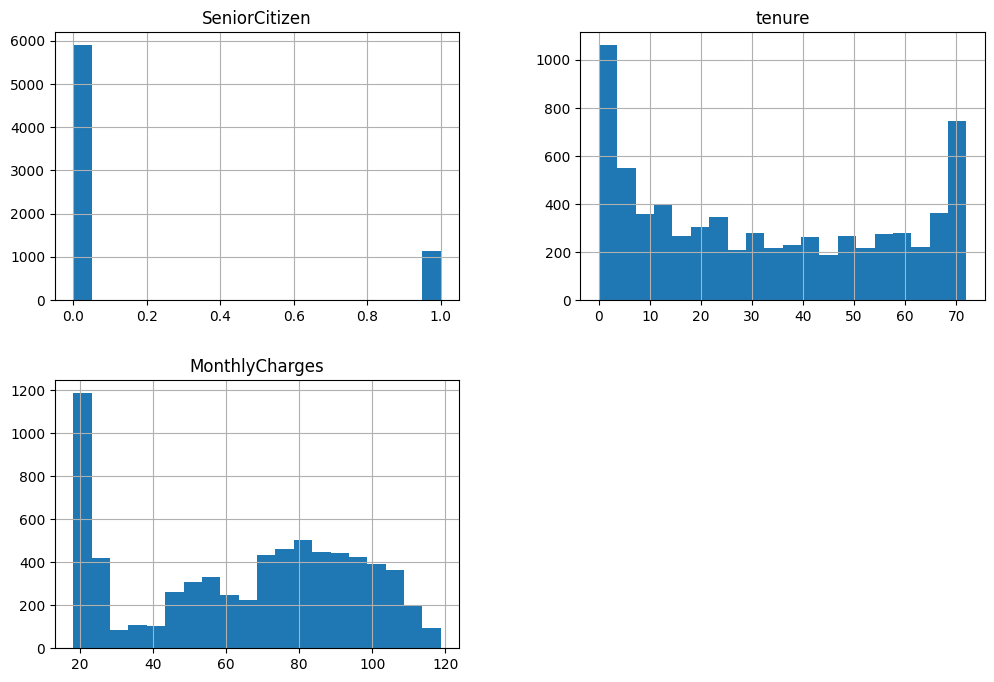

In [26]:
# Visualizing the distribution of numerical features using histograms
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout
plt.show()

### Analyze the Target Variable

<function matplotlib.pyplot.show(close=None, block=None)>

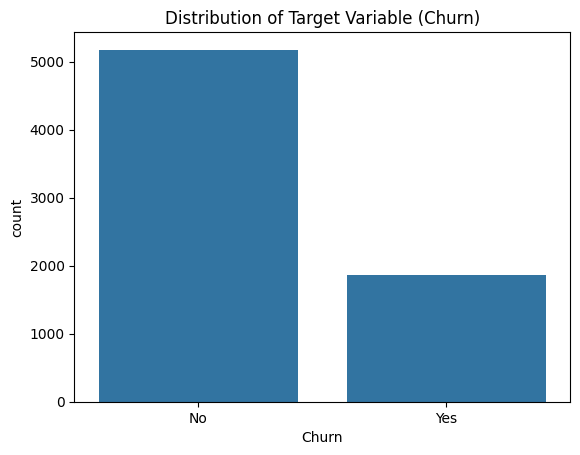

In [36]:
# Disribution of target variable ("Churn")
sns.countplot(data=df, x='Churn')
plt.title("Distribution of Target Variable (Churn)")
plt.show